# **02. Introducción a la visualización de datos: Distribuciones.**

In [52]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set(style="whitegrid", context="talk")

## Importamos los datos

In [5]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/analisis_datos_python_2021/COVID-19 Survey Student Responses-clean.csv')
df.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


Seleccionamos las columnas numéricas.

In [6]:
df_num = df.select_dtypes('number')
df_num.head()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
0,21,2.0,4.0,0.0,7.0,3.0,4
1,21,0.0,0.0,2.0,10.0,3.0,3
2,20,7.0,3.0,0.0,6.0,2.0,3
3,20,3.0,2.0,1.0,6.0,5.0,3
4,21,3.0,3.0,1.0,8.0,3.0,4


## Boxplots.

---

### Age


In [7]:
def graphic_filter(df,column_name, val):
  fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

  sns.boxplot(ax=axes[0], x=df[column_name]).set_title('No filter')
  axes[0].axvline(df[column_name].mean(), c='r',ls=':')

  iqr = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
  filtro_inferior = df[column_name] > df[column_name].quantile(0.25) - (iqr * val)
  filtro_superior = df[column_name] < df[column_name].quantile(0.75) + (iqr * val)

  df_filtrado = df[filtro_inferior & filtro_superior]
  sns.boxplot(ax=axes[1], x=df_filtrado[column_name]).set_title('Filtered')
  axes[1].axvline(df[column_name].mean(), c='r',ls=':')

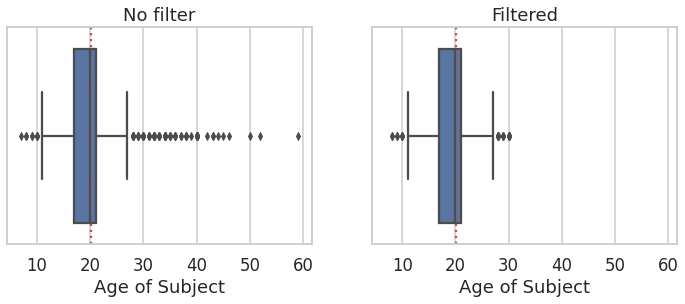

In [8]:
graphic_filter(df, 'Age of Subject', 2.5)

### Time spent on Online Class

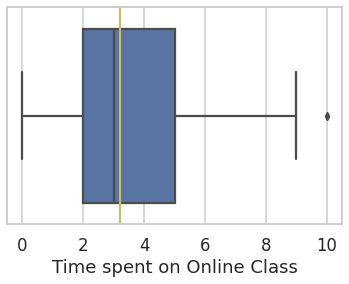

In [9]:
sns.boxplot(x=df['Time spent on Online Class'])
plt.axvline(df['Time spent on Online Class'].mean(), c='y')

### Time spent on self study

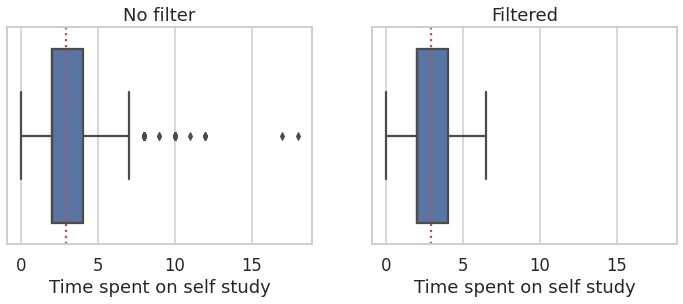

In [10]:
graphic_filter(df, 'Time spent on self study', 1.5)

### Time spent on fitness

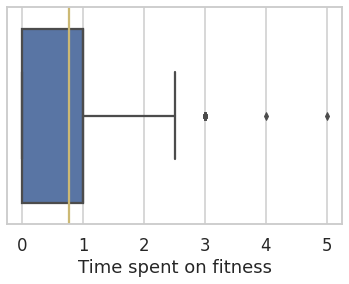

In [11]:
sns.boxplot(x=df['Time spent on fitness'])
plt.axvline(df['Time spent on fitness'].mean(), c='y')

### Time spent on sleep

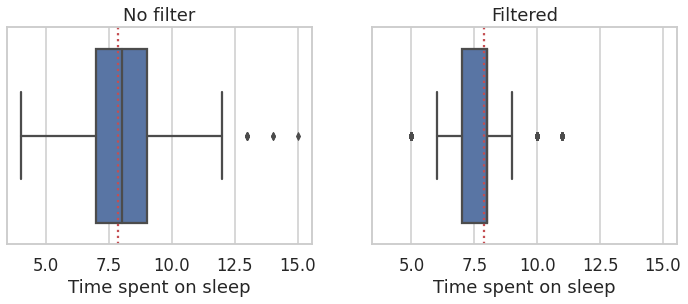

In [12]:
graphic_filter(df, 'Time spent on sleep', 1.5)

### Time spent on social media

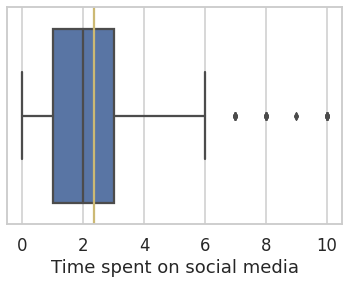

In [13]:
sns.boxplot(x=df['Time spent on social media'])
plt.axvline(df['Time spent on social media'].mean(), c='y')

### Number of meals per day

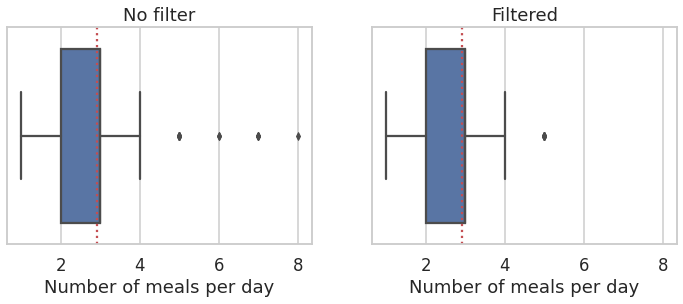

In [14]:
graphic_filter(df, 'Number of meals per day', 2.5)

Tomando como filtro estándar el valor de 1.5 veces el rango intercuartílico inferior y superior, la media, mediana y desviación de las variables se modifican como sigue:

In [15]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
     
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 
for i in df_num.columns:
    removeOutliers(df_num, i)

In [16]:
df_num.mean();
filtered_data.mean()

Age of Subject                20.179949
Time spent on Online Class     3.223436
Time spent on self study       2.893745
Time spent on fitness          0.755955
Time spent on sleep            7.867866
Time spent on social media     2.371422
Number of meals per day        2.880034
dtype: float64

## Tablas de frecuencia

Segmentamos nuestros datos basándonos en su rango

In [37]:
ages = df_num['Age of Subject']
ages.max() - ages.min()

52

## Histogramas

In [49]:
segmentos = pd.cut(ages, 5)
df_num['Age of Subject'].groupby(segmentos).count()

Age of Subject
(6.948, 17.4]    302
(17.4, 27.8]     793
(27.8, 38.2]      63
(38.2, 48.6]      21
(48.6, 59.0]       3
Name: Age of Subject, dtype: int64

Curtosis: 3.8425947214149367
Asimetría: 1.69714957696885


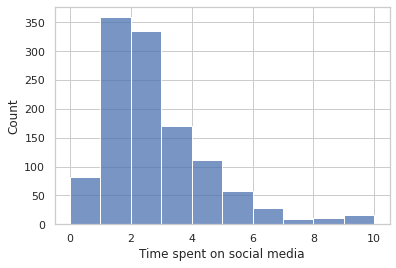

In [56]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( df['Time spent on social media'] ))
print('Asimetría:', skew( df['Time spent on social media'] ));
sns.histplot(df['Time spent on social media'], kde=False, binwidth=1);

Curtosis: 1.5705858379298991
Asimetría: 0.9669438302120138


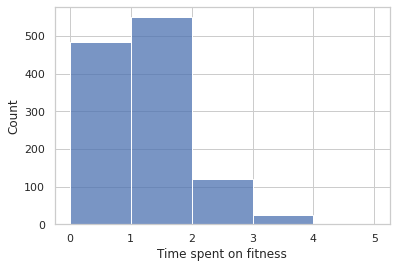

In [57]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( df['Time spent on fitness'] ))
print('Asimetría:', skew( df['Time spent on fitness'] ));
sns.histplot(df['Time spent on fitness'], kde=False, binwidth=1);

## Gráficos de densidad

In [71]:
df['Medium for online class'].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', 'No medium',
       'Any Gadget', 'Smartphone or Laptop/Desktop'], dtype=object)

In [17]:
df_group = df.groupby(level=0)['Time spent on Online Class', 'Time spent on self study'].mean()

In [18]:
df_medium = df.groupby(level=0)['Medium for online class'].last()
df_medium

0       Laptop/Desktop
1           Smartphone
2       Laptop/Desktop
3           Smartphone
4       Laptop/Desktop
             ...      
1177        Smartphone
1178        Smartphone
1179        Smartphone
1180    Laptop/Desktop
1181            Tablet
Name: Medium for online class, Length: 1182, dtype: object

In [19]:
df_fusion = df_group.merge(df_medium, left_index=True, right_index=True)
df_fusion.head()

,Time spent on Online Class,Time spent on self study,Medium for online class
0,2.0,4.0,Laptop/Desktop
1,0.0,0.0,Smartphone
2,7.0,3.0,Laptop/Desktop
3,3.0,2.0,Smartphone
4,3.0,3.0,Laptop/Desktop


In [31]:
df_tablet = df_group[df_fusion['Medium for online class'] =='Tablet']
df_laptop = df_group[df_fusion['Medium for online class'] =='Laptop/Desktop']
df_smart = df_group[df_fusion['Medium for online class'] == 'Smartphone']

df_smart.head(3)

,Time spent on Online Class,Time spent on self study
1,0.0,0.0
3,3.0,2.0
5,0.0,6.0


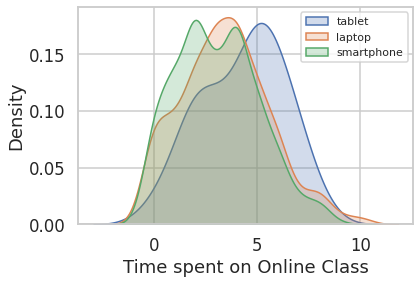

In [27]:
ax = sns.distplot(df_tablet['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, label='tablet')
sns.distplot(df_laptop['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, ax=ax, label='laptop');
sns.distplot(df_smart['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, ax=ax, label= 'smartphone' );
#ax.set_title('Mediciones de glucosa en pacientes sanas y en riesgo', fontsize=13, pad=15);
ax.legend(loc='upper right', fontsize=11);

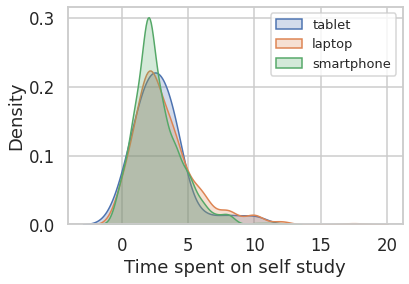

In [30]:
ax = sns.distplot(df_tablet['Time spent on self study'], hist = False, kde_kws = {'shade': True}, label='tablet')
sns.distplot(df_laptop['Time spent on self study'], hist = False, kde_kws = {'shade': True}, ax=ax, label='laptop');
sns.distplot(df_smart['Time spent on self study'], hist = False, kde_kws = {'shade': True}, ax=ax, label= 'smartphone');
ax.legend(loc='upper right', fontsize=13);